# TEST

In [2]:
from unified_noise_model.Unified_Noise_Model import Unified_Noise_Model
from qiskit.circuit.library import XGate

In [3]:
# UNM with dep. channel
a = Unified_Noise_Model()
a.add_depolarizing_channel(
0.5,
['sx'],
['cx'])
print(a.noise_model)

#print('----------------------------------------------------------')
#print(a.one_qubit_gates_depolarizing_noise_channel)
#print('----------------------------------------------------------')
#print(a.two_qubits_gates_depolarizing_noise_channel)


NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['sx', 'cx']
  All-qubits errors: ['sx', 'cx']


In [4]:
# UNM with relax. deph. channel
a = Unified_Noise_Model()
a.add_relaxation_dephasing_channel(
range(2),[0.4,0.4],
[0.1,0.2],
['sx','rz'],
[[0.1,0.3],[0.2,0.4]],
['cx','cz'],
[0.3,0.4])
print(a.noise_model)

#print(a.one_qubit_gates_relaxation_dephasing_noise_channel)
#print('----------------------------------------------------------')
#print(a.two_qubits_gates_relaxation_dephasing_noise_channel)
#print('----------------------------------------------------------')


NoiseModel:
  Basis gates: ['cx', 'cz', 'id', 'rz', 'sx']
  Instructions with noise: ['sx', 'cz', 'cx', 'rz']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('sx', (0,)), ('sx', (1,)), ('rz', (0,)), ('rz', (1,)), ('cx', (0, 0)), ('cx', (0, 1)), ('cx', (1, 0)), ('cx', (1, 1)), ('cz', (0, 0)), ('cz', (0, 1)), ('cz', (1, 0)), ('cz', (1, 1))]


In [5]:
# UNM with SPAM channel
x_StatePreparation = XGate(label='x_StatePreparation')
a = Unified_Noise_Model()
a.add_spam_channel(
    0.3,
    0.5,
    x_StatePreparation
)
print(a.noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x']
  Instructions with noise: ['measure', 'x_StatePreparation']
  All-qubits errors: ['x_StatePreparation', 'measure']


In [6]:
# Complete UNM
x_StatePreparation = XGate(label='x_StatePreparation')
a = Unified_Noise_Model()

a.add_all_noise_channels(0.3,
    0.4,
    x_StatePreparation,
    0.2,
    ['x','y'],
    [[2,3],[3,4]],
    ['cx'],
    [0.4,2],
    range(2),
    [3,4],
    [4,5])

print(a.noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'x', 'y']
  Instructions with noise: ['cx', 'y', 'x', 'x_StatePreparation', 'measure']
  Qubits with noise: [0, 1]
  All-qubits errors: ['x_StatePreparation', 'measure']
  Specific qubit errors: [('x', (0,)), ('x', (1,)), ('y', (0,)), ('y', (1,)), ('cx', (0, 0)), ('cx', (0, 1)), ('cx', (1, 0)), ('cx', (1, 1))]


# TEST2

### Imports and configuration

In [1]:
from unified_noise_model.Unified_Noise_Model import Unified_Noise_Model
from qiskit.circuit.library import XGate

In [2]:
from qiskit_ibm_provider import IBMProvider
token = '825a8b2e6fb861f63088f866e59357e49447b4b9b24ff6136e56dcc28f2fb0cedda6c2976b9e2aef48129a80864265494be7f8a7aae5b9ebd6654a7d80d9b5cb' #ingresar token
#MOSTRAR BACKENDS DE IBMQ
IBMProvider.save_account(token= token, overwrite=True)
provider = IBMProvider()
#print(provider.backends())

In [3]:
backend = provider.get_backend('ibm_brisbane')
#backend.properties().gate_property('ecr')

### 1st test

In [4]:
a = Unified_Noise_Model()
a.noise_model

<NoiseModel on []>

In [5]:
a.add_calibration_data("./ibm_brisbane.csv",['id', 'rz', 'sx', 'x'],['ecr'],backend)

Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence

In [6]:
a.print_calibration_data()

------------------------------------------------
SINGLE QUBIT BASIS GATES:
['id', 'rz', 'sx', 'x']
------------------------------------------------
TWO QUBITS BASIS GATES:
['ecr']
------------------------------------------------
QUBITS:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
------------------------------------------------
SINGLE QUBIT ERROR RATES:


{0: 0.0001961413085,
 1: 0.0001390148586,
 2: 0.0001952864722,
 3: 0.0001730525105,
 4: 0.0001204532456,
 5: 0.0001707168243,
 6: 0.0009056918192,
 7: 0.0003571303054,
 8: 0.0001505783253,
 9: 0.0002293269386,
 10: 0.0002511333926,
 11: 0.0002054500929,
 12: 0.0001719717855,
 13: 0.0002304662631,
 14: 0.000158362268,
 15: 0.0004725500845,
 16: 0.0002379246317,
 17: 0.000157310208,
 18: 0.0005412709849,
 19: 0.0002451177689,
 20: 0.0002362666872,
 21: 0.0001980841174,
 22: 0.0006769925071,
 23: 0.0002121197628,
 24: 0.0002614348053,
 25: 0.0002305295935,
 26: 0.0002176629987,
 27: 0.0001868456084,
 28: 0.0003267881442,
 29: 9.148835863e-05,
 30: 0.0003042057402,
 31: 0.0001945542845,
 32: 0.0004683667826,
 33: 0.0002385741542,
 34: 0.000135303451,
 35: 0.0003359321188,
 36: 0.0002693026023,
 37: 0.0001562673298,
 38: 0.000445145933,
 39: 0.0009445263404,
 40: 0.0001769900315,
 41: 0.0001353344106,
 42: 0.000776938166,
 43: 0.001111620585,
 44: 0.000373830161,
 45: 0.001156831367,
 46: 0

------------------------------------------------
TWO QUBITS ERROR RATES:


{'1_0': 0.017671366073595096,
 '2_1': 0.008644540424665087,
 '3_2': 0.0066572605698366205,
 '4_5': 0.012109086985429701,
 '4_3': 0.004981406510880831,
 '4_15': 0.004864111959271167,
 '6_7': 0.005810400571444219,
 '6_5': 0.004950645834681466,
 '7_8': 0.007070007813789442,
 '8_9': 0.011639410457110116,
 '10_11': 0.004641250284009912,
 '10_9': 0.006924939199244501,
 '11_12': 0.003694510772123405,
 '12_17': 0.01229127058127899,
 '13_12': 0.006556591952591617,
 '14_0': 0.005560767111661702,
 '14_18': 0.006955072273549079,
 '15_22': 0.02204236246195626,
 '16_26': 0.006420033460741714,
 '16_8': 0.00580207785858583,
 '17_30': 0.006122792227557017,
 '18_19': 0.005845774812963778,
 '20_33': 0.03046905024159341,
 '20_19': 0.007681999485731894,
 '21_20': 0.005754961748584864,
 '21_22': 0.016238812402877528,
 '22_23': 0.0584293340815604,
 '24_34': 0.00852199497179415,
 '24_23': 0.005661103088163005,
 '25_24': 0.007475617133301693,
 '26_25': 0.01210240573318247,
 '27_26': 0.007096973786231864,
 '28_

------------------------------------------------
MEASUREMENT ERROR RATES:


{0: 0.0262,
 1: 0.0257,
 2: 0.0163,
 3: 0.0222,
 4: 0.0145,
 5: 0.0057,
 6: 0.0095,
 7: 0.0227,
 8: 0.0107,
 9: 0.0077,
 10: 0.0157,
 11: 0.133,
 12: 0.0141,
 13: 0.0173,
 14: 0.0185,
 15: 0.0115,
 16: 0.0176,
 17: 0.014,
 18: 0.0838,
 19: 0.0577,
 20: 0.0109,
 21: 0.0077,
 22: 0.0111,
 23: 0.0105,
 24: 0.206,
 25: 0.009,
 26: 0.0065,
 27: 0.0527,
 28: 0.0258,
 29: 0.0224,
 30: 0.0082,
 31: 0.0047,
 32: 0.0094,
 33: 0.0104,
 34: 0.0318,
 35: 0.0156,
 36: 0.0125,
 37: 0.0092,
 38: 0.0292,
 39: 0.0149,
 40: 0.0122,
 41: 0.0109,
 42: 0.0106,
 43: 0.023,
 44: 0.0176,
 45: 0.0357,
 46: 0.0121,
 47: 0.0087,
 48: 0.0147,
 49: 0.0075,
 50: 0.0124,
 51: 0.0121,
 52: 0.0081,
 53: 0.0119,
 54: 0.0186,
 55: 0.0129,
 56: 0.0086,
 57: 0.0108,
 58: 0.0093,
 59: 0.0229,
 60: 0.0199,
 61: 0.0195,
 62: 0.0113,
 63: 0.0116,
 64: 0.0104,
 65: 0.0091,
 66: 0.0116,
 67: 0.0639,
 68: 0.0413,
 69: 0.0114,
 70: 0.0773,
 71: 0.0131,
 72: 0.0124,
 73: 0.0099,
 74: 0.0283,
 75: 0.0068,
 76: 0.0087,
 77: 0.0421,
 

------------------------------------------------
T1s:
[2.78620813e-04 2.50835945e-04 1.74088333e-04 2.65407635e-04
 2.82194809e-04 2.41708995e-04 3.09186578e-04 3.70549188e-04
 3.44261712e-04 2.50296888e-04 2.64377690e-04 3.54895024e-04
 2.50413967e-04 2.72500475e-04 3.03169347e-04 2.65401974e-04
 2.62639194e-04 2.39702903e-04 1.68569112e-04 2.92030215e-04
 1.76935023e-04 2.07211207e-04 2.47939819e-04 1.66561436e-04
 1.77466242e-04 2.40520533e-04 2.13078400e-04 1.52984809e-04
 1.83623740e-04 1.92694631e-04 2.69536244e-04 1.48901938e-04
 1.47146838e-04 2.68446776e-04 2.51968591e-04 1.68691345e-04
 2.77812387e-04 2.89281981e-04 2.62769865e-04 1.68842757e-04
 1.65580415e-04 1.52926639e-04 1.72168739e-04 2.14328447e-04
 2.15757115e-04 2.09505590e-04 2.28617327e-04 1.58764437e-04
 1.65009944e-04 2.84432287e-04 2.90369062e-04 2.26691335e-04
 2.00882727e-04 1.28174529e-04 1.92797110e-04 3.13537442e-04
 2.50449509e-04 2.24544766e-04 1.47189330e-04 1.56444233e-04
 2.83947719e-04 3.77953289e-04 

In [7]:
a.add_depolarizing_channel2()
a.add_spam_channel2()
a.add_relaxation_dephasing_channel2()
a.noise_model.to_dict()

{'errors': [{'type': 'qerror',
   'id': 'a2a0cac957aa43d8b71838f58d084eb6',
   'operations': ['id'],
   'instructions': [[{'name': 'id', 'qubits': [0]}],
    [{'name': 'x', 'qubits': [0]}],
    [{'name': 'y', 'qubits': [0]}],
    [{'name': 'z', 'qubits': [0]}]],
   'probabilities': [0.9998528940186251,
    4.903532712500001e-05,
    4.903532712500001e-05,
    4.903532712500001e-05],
   'gate_qubits': [(0,)]},
  {'type': 'qerror',
   'id': 'f1e7864d008d4427a8b31efdf44f404b',
   'operations': ['id'],
   'instructions': [[{'name': 'id', 'qubits': [0]}],
    [{'name': 'x', 'qubits': [0]}],
    [{'name': 'y', 'qubits': [0]}],
    [{'name': 'z', 'qubits': [0]}]],
   'probabilities': [0.99989573885605,
    3.475371465e-05,
    3.475371465e-05,
    3.475371465e-05],
   'gate_qubits': [(1,)]},
  {'type': 'qerror',
   'id': 'ca894d3094af4c4fa4a1d09405f0451f',
   'operations': ['id'],
   'instructions': [[{'name': 'id', 'qubits': [0]}],
    [{'name': 'x', 'qubits': [0]}],
    [{'name': 'y', 'qubi

### 2nd test

In [8]:
a = Unified_Noise_Model()
a.add_calibration_data("./ibm_brisbane.csv",['id', 'rz', 'sx', 'x'],['ecr'],backend)
a.print_calibration_data()
a.add_all_noise_channels2()

Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence

{0: 0.0001961413085,
 1: 0.0001390148586,
 2: 0.0001952864722,
 3: 0.0001730525105,
 4: 0.0001204532456,
 5: 0.0001707168243,
 6: 0.0009056918192,
 7: 0.0003571303054,
 8: 0.0001505783253,
 9: 0.0002293269386,
 10: 0.0002511333926,
 11: 0.0002054500929,
 12: 0.0001719717855,
 13: 0.0002304662631,
 14: 0.000158362268,
 15: 0.0004725500845,
 16: 0.0002379246317,
 17: 0.000157310208,
 18: 0.0005412709849,
 19: 0.0002451177689,
 20: 0.0002362666872,
 21: 0.0001980841174,
 22: 0.0006769925071,
 23: 0.0002121197628,
 24: 0.0002614348053,
 25: 0.0002305295935,
 26: 0.0002176629987,
 27: 0.0001868456084,
 28: 0.0003267881442,
 29: 9.148835863e-05,
 30: 0.0003042057402,
 31: 0.0001945542845,
 32: 0.0004683667826,
 33: 0.0002385741542,
 34: 0.000135303451,
 35: 0.0003359321188,
 36: 0.0002693026023,
 37: 0.0001562673298,
 38: 0.000445145933,
 39: 0.0009445263404,
 40: 0.0001769900315,
 41: 0.0001353344106,
 42: 0.000776938166,
 43: 0.001111620585,
 44: 0.000373830161,
 45: 0.001156831367,
 46: 0

------------------------------------------------
TWO QUBITS ERROR RATES:


{'1_0': 0.017671366073595096,
 '2_1': 0.008644540424665087,
 '3_2': 0.0066572605698366205,
 '4_5': 0.012109086985429701,
 '4_3': 0.004981406510880831,
 '4_15': 0.004864111959271167,
 '6_7': 0.005810400571444219,
 '6_5': 0.004950645834681466,
 '7_8': 0.007070007813789442,
 '8_9': 0.011639410457110116,
 '10_11': 0.004641250284009912,
 '10_9': 0.006924939199244501,
 '11_12': 0.003694510772123405,
 '12_17': 0.01229127058127899,
 '13_12': 0.006556591952591617,
 '14_0': 0.005560767111661702,
 '14_18': 0.006955072273549079,
 '15_22': 0.02204236246195626,
 '16_26': 0.006420033460741714,
 '16_8': 0.00580207785858583,
 '17_30': 0.006122792227557017,
 '18_19': 0.005845774812963778,
 '20_33': 0.03046905024159341,
 '20_19': 0.007681999485731894,
 '21_20': 0.005754961748584864,
 '21_22': 0.016238812402877528,
 '22_23': 0.0584293340815604,
 '24_34': 0.00852199497179415,
 '24_23': 0.005661103088163005,
 '25_24': 0.007475617133301693,
 '26_25': 0.01210240573318247,
 '27_26': 0.007096973786231864,
 '28_

------------------------------------------------
MEASUREMENT ERROR RATES:


{0: 0.0262,
 1: 0.0257,
 2: 0.0163,
 3: 0.0222,
 4: 0.0145,
 5: 0.0057,
 6: 0.0095,
 7: 0.0227,
 8: 0.0107,
 9: 0.0077,
 10: 0.0157,
 11: 0.133,
 12: 0.0141,
 13: 0.0173,
 14: 0.0185,
 15: 0.0115,
 16: 0.0176,
 17: 0.014,
 18: 0.0838,
 19: 0.0577,
 20: 0.0109,
 21: 0.0077,
 22: 0.0111,
 23: 0.0105,
 24: 0.206,
 25: 0.009,
 26: 0.0065,
 27: 0.0527,
 28: 0.0258,
 29: 0.0224,
 30: 0.0082,
 31: 0.0047,
 32: 0.0094,
 33: 0.0104,
 34: 0.0318,
 35: 0.0156,
 36: 0.0125,
 37: 0.0092,
 38: 0.0292,
 39: 0.0149,
 40: 0.0122,
 41: 0.0109,
 42: 0.0106,
 43: 0.023,
 44: 0.0176,
 45: 0.0357,
 46: 0.0121,
 47: 0.0087,
 48: 0.0147,
 49: 0.0075,
 50: 0.0124,
 51: 0.0121,
 52: 0.0081,
 53: 0.0119,
 54: 0.0186,
 55: 0.0129,
 56: 0.0086,
 57: 0.0108,
 58: 0.0093,
 59: 0.0229,
 60: 0.0199,
 61: 0.0195,
 62: 0.0113,
 63: 0.0116,
 64: 0.0104,
 65: 0.0091,
 66: 0.0116,
 67: 0.0639,
 68: 0.0413,
 69: 0.0114,
 70: 0.0773,
 71: 0.0131,
 72: 0.0124,
 73: 0.0099,
 74: 0.0283,
 75: 0.0068,
 76: 0.0087,
 77: 0.0421,
 

------------------------------------------------
T1s:
[2.78620813e-04 2.50835945e-04 1.74088333e-04 2.65407635e-04
 2.82194809e-04 2.41708995e-04 3.09186578e-04 3.70549188e-04
 3.44261712e-04 2.50296888e-04 2.64377690e-04 3.54895024e-04
 2.50413967e-04 2.72500475e-04 3.03169347e-04 2.65401974e-04
 2.62639194e-04 2.39702903e-04 1.68569112e-04 2.92030215e-04
 1.76935023e-04 2.07211207e-04 2.47939819e-04 1.66561436e-04
 1.77466242e-04 2.40520533e-04 2.13078400e-04 1.52984809e-04
 1.83623740e-04 1.92694631e-04 2.69536244e-04 1.48901938e-04
 1.47146838e-04 2.68446776e-04 2.51968591e-04 1.68691345e-04
 2.77812387e-04 2.89281981e-04 2.62769865e-04 1.68842757e-04
 1.65580415e-04 1.52926639e-04 1.72168739e-04 2.14328447e-04
 2.15757115e-04 2.09505590e-04 2.28617327e-04 1.58764437e-04
 1.65009944e-04 2.84432287e-04 2.90369062e-04 2.26691335e-04
 2.00882727e-04 1.28174529e-04 1.92797110e-04 3.13537442e-04
 2.50449509e-04 2.24544766e-04 1.47189330e-04 1.56444233e-04
 2.83947719e-04 3.77953289e-04 

### 3rd test - noise on QAOA

In [9]:
#some regular python libraries
import networkx as nx
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

#import problem classes from OQ for easy problem creation
from openqaoa.problems import MaximumCut, NumberPartition

#import the QAOA workflow model
from openqaoa import QAOA

#import method to specify the device
from openqaoa.backends import create_device

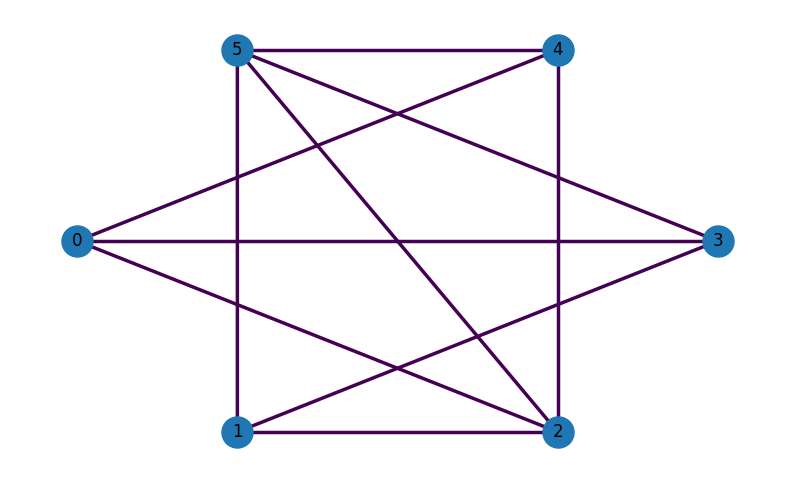

In [10]:
nodes = 6
edge_probability = 0.6
g = nx.generators.fast_gnp_random_graph(n=nodes, p=edge_probability, seed=42)

# import graph plotter from openqaoa
from openqaoa.utilities import plot_graph
plot_graph(g)

In [11]:
# Use the MaximumCut class to instantiate the problem.
maxcut_prob = MaximumCut(g)

# The property `qubo` translates the problem into a binary Qubo problem.
# The binary values can be access via the `asdict()` method.
maxcut_qubo = maxcut_prob.qubo

hamiltonian = maxcut_qubo.hamiltonian

# import the brute-force solver to obtain exact solution
from openqaoa.utilities import ground_state_hamiltonian
energy, configuration = ground_state_hamiltonian(hamiltonian)
print(f"Ground State energy: {energy}, Solution: {configuration}")

Ground State energy: -6.0, Solution: ['001110', '110001']


In [12]:
q_ideal = QAOA()
q_noisy = QAOA()

In [13]:
# optionally configure the following properties of the model

# device
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q_ideal.set_device(qiskit_device)

# circuit properties
q_ideal.set_circuit_properties(p=2, param_type='standard', init_type='rand', mixer_hamiltonian='x')

# backend properties (already set by default)
q_ideal.set_backend_properties(prepend_state=None, append_state=None)

# classical optimizer properties
q_ideal.set_classical_optimizer(method='nelder-mead', maxiter=200, tol=0.001,
                          optimization_progress=True, cost_progress=True, parameter_log=True)

In [14]:
# optionally configure the following properties of the model

# device
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q_noisy.set_device(qiskit_device)

# circuit properties
q_noisy.set_circuit_properties(p=2, param_type='standard', init_type='rand', mixer_hamiltonian='x')

# backend properties (already set by default)
a = Unified_Noise_Model()
a.add_calibration_data("./ibm_brisbane.csv",['id', 'rz', 'sx', 'x'],['ecr'],backend)
a.print_calibration_data()
a.add_all_noise_channels2()
q_noisy.set_backend_properties(prepend_state=None, append_state=None,noise_model=a.noise_model)

# classical optimizer properties
q_noisy.set_classical_optimizer(method='nelder-mead', maxiter=200, tol=0.001,
                          optimization_progress=True, cost_progress=True, parameter_log=True)

Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence

{0: 0.0001961413085,
 1: 0.0001390148586,
 2: 0.0001952864722,
 3: 0.0001730525105,
 4: 0.0001204532456,
 5: 0.0001707168243,
 6: 0.0009056918192,
 7: 0.0003571303054,
 8: 0.0001505783253,
 9: 0.0002293269386,
 10: 0.0002511333926,
 11: 0.0002054500929,
 12: 0.0001719717855,
 13: 0.0002304662631,
 14: 0.000158362268,
 15: 0.0004725500845,
 16: 0.0002379246317,
 17: 0.000157310208,
 18: 0.0005412709849,
 19: 0.0002451177689,
 20: 0.0002362666872,
 21: 0.0001980841174,
 22: 0.0006769925071,
 23: 0.0002121197628,
 24: 0.0002614348053,
 25: 0.0002305295935,
 26: 0.0002176629987,
 27: 0.0001868456084,
 28: 0.0003267881442,
 29: 9.148835863e-05,
 30: 0.0003042057402,
 31: 0.0001945542845,
 32: 0.0004683667826,
 33: 0.0002385741542,
 34: 0.000135303451,
 35: 0.0003359321188,
 36: 0.0002693026023,
 37: 0.0001562673298,
 38: 0.000445145933,
 39: 0.0009445263404,
 40: 0.0001769900315,
 41: 0.0001353344106,
 42: 0.000776938166,
 43: 0.001111620585,
 44: 0.000373830161,
 45: 0.001156831367,
 46: 0

------------------------------------------------
TWO QUBITS ERROR RATES:


{'1_0': 0.017671366073595096,
 '2_1': 0.008644540424665087,
 '3_2': 0.0066572605698366205,
 '4_5': 0.012109086985429701,
 '4_3': 0.004981406510880831,
 '4_15': 0.004864111959271167,
 '6_7': 0.005810400571444219,
 '6_5': 0.004950645834681466,
 '7_8': 0.007070007813789442,
 '8_9': 0.011639410457110116,
 '10_11': 0.004641250284009912,
 '10_9': 0.006924939199244501,
 '11_12': 0.003694510772123405,
 '12_17': 0.01229127058127899,
 '13_12': 0.006556591952591617,
 '14_0': 0.005560767111661702,
 '14_18': 0.006955072273549079,
 '15_22': 0.02204236246195626,
 '16_26': 0.006420033460741714,
 '16_8': 0.00580207785858583,
 '17_30': 0.006122792227557017,
 '18_19': 0.005845774812963778,
 '20_33': 0.03046905024159341,
 '20_19': 0.007681999485731894,
 '21_20': 0.005754961748584864,
 '21_22': 0.016238812402877528,
 '22_23': 0.0584293340815604,
 '24_34': 0.00852199497179415,
 '24_23': 0.005661103088163005,
 '25_24': 0.007475617133301693,
 '26_25': 0.01210240573318247,
 '27_26': 0.007096973786231864,
 '28_

------------------------------------------------
MEASUREMENT ERROR RATES:


{0: 0.0262,
 1: 0.0257,
 2: 0.0163,
 3: 0.0222,
 4: 0.0145,
 5: 0.0057,
 6: 0.0095,
 7: 0.0227,
 8: 0.0107,
 9: 0.0077,
 10: 0.0157,
 11: 0.133,
 12: 0.0141,
 13: 0.0173,
 14: 0.0185,
 15: 0.0115,
 16: 0.0176,
 17: 0.014,
 18: 0.0838,
 19: 0.0577,
 20: 0.0109,
 21: 0.0077,
 22: 0.0111,
 23: 0.0105,
 24: 0.206,
 25: 0.009,
 26: 0.0065,
 27: 0.0527,
 28: 0.0258,
 29: 0.0224,
 30: 0.0082,
 31: 0.0047,
 32: 0.0094,
 33: 0.0104,
 34: 0.0318,
 35: 0.0156,
 36: 0.0125,
 37: 0.0092,
 38: 0.0292,
 39: 0.0149,
 40: 0.0122,
 41: 0.0109,
 42: 0.0106,
 43: 0.023,
 44: 0.0176,
 45: 0.0357,
 46: 0.0121,
 47: 0.0087,
 48: 0.0147,
 49: 0.0075,
 50: 0.0124,
 51: 0.0121,
 52: 0.0081,
 53: 0.0119,
 54: 0.0186,
 55: 0.0129,
 56: 0.0086,
 57: 0.0108,
 58: 0.0093,
 59: 0.0229,
 60: 0.0199,
 61: 0.0195,
 62: 0.0113,
 63: 0.0116,
 64: 0.0104,
 65: 0.0091,
 66: 0.0116,
 67: 0.0639,
 68: 0.0413,
 69: 0.0114,
 70: 0.0773,
 71: 0.0131,
 72: 0.0124,
 73: 0.0099,
 74: 0.0283,
 75: 0.0068,
 76: 0.0087,
 77: 0.0421,
 

------------------------------------------------
T1s:
[2.78620813e-04 2.50835945e-04 1.74088333e-04 2.65407635e-04
 2.82194809e-04 2.41708995e-04 3.09186578e-04 3.70549188e-04
 3.44261712e-04 2.50296888e-04 2.64377690e-04 3.54895024e-04
 2.50413967e-04 2.72500475e-04 3.03169347e-04 2.65401974e-04
 2.62639194e-04 2.39702903e-04 1.68569112e-04 2.92030215e-04
 1.76935023e-04 2.07211207e-04 2.47939819e-04 1.66561436e-04
 1.77466242e-04 2.40520533e-04 2.13078400e-04 1.52984809e-04
 1.83623740e-04 1.92694631e-04 2.69536244e-04 1.48901938e-04
 1.47146838e-04 2.68446776e-04 2.51968591e-04 1.68691345e-04
 2.77812387e-04 2.89281981e-04 2.62769865e-04 1.68842757e-04
 1.65580415e-04 1.52926639e-04 1.72168739e-04 2.14328447e-04
 2.15757115e-04 2.09505590e-04 2.28617327e-04 1.58764437e-04
 1.65009944e-04 2.84432287e-04 2.90369062e-04 2.26691335e-04
 2.00882727e-04 1.28174529e-04 1.92797110e-04 3.13537442e-04
 2.50449509e-04 2.24544766e-04 1.47189330e-04 1.56444233e-04
 2.83947719e-04 3.77953289e-04 

In [15]:
q_ideal.compile(maxcut_qubo)
q_noisy.compile(maxcut_qubo)

q_ideal.optimize()
q_ideal_result = q_ideal.result

q_noisy.optimize()
q_noisy_result = q_noisy.result

states kept: 40
states kept: 38


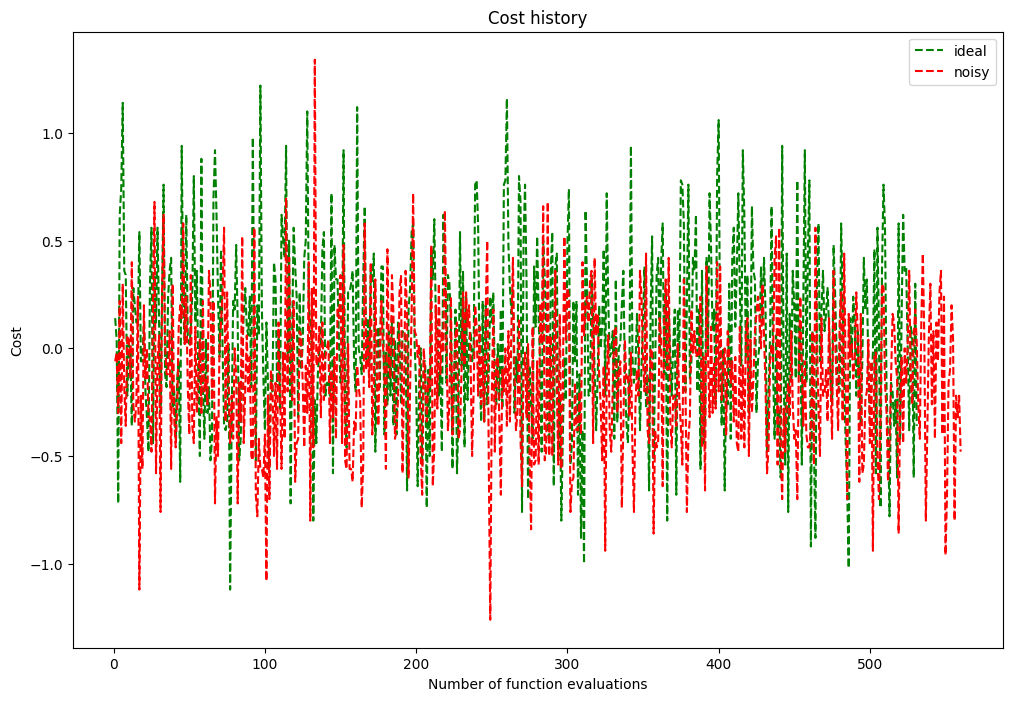

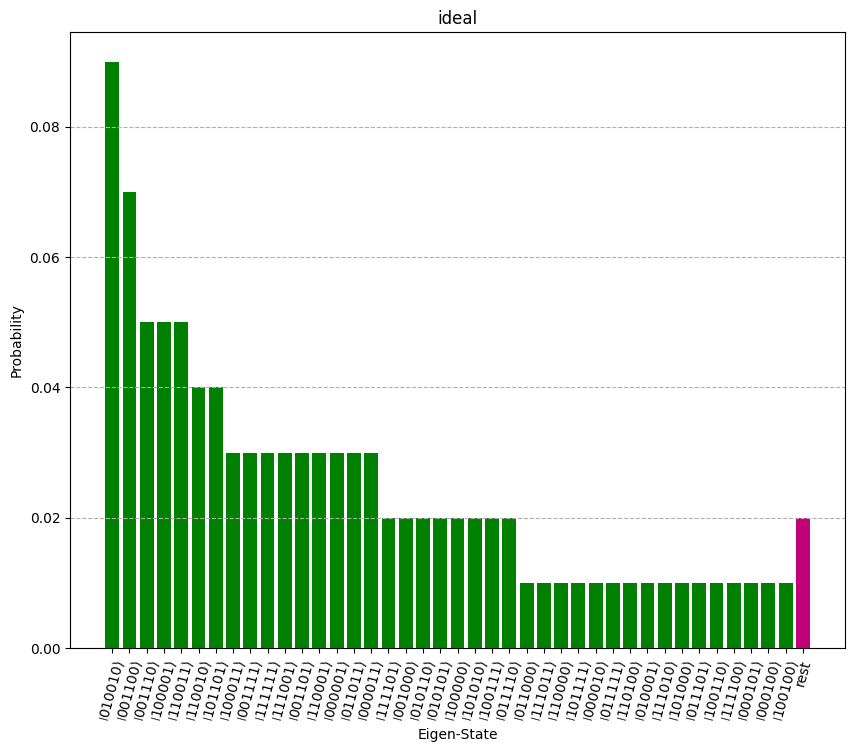

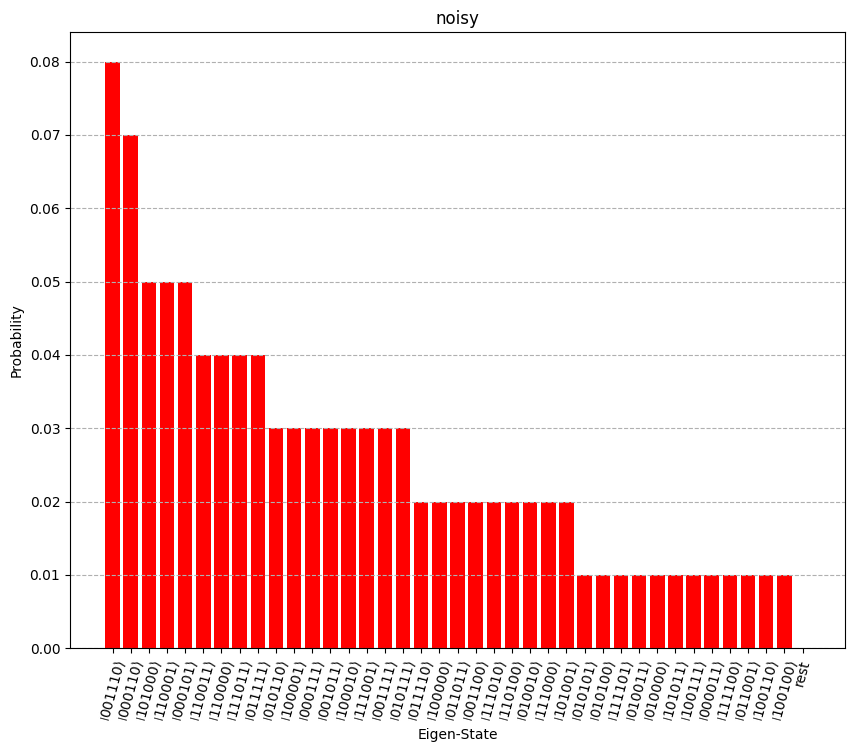

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
q_ideal_result.plot_cost(ax=ax,color='green',label='ideal')
q_noisy_result.plot_cost(ax=ax,color='red',label='noisy')

q_ideal_result.plot_probabilities(color='green',label='ideal')
q_noisy_result.plot_probabilities(color='red',label='noisy')



### 4th test - Grover search

In [17]:
from qiskit import QuantumCircuit,QuantumRegister, transpile
from qiskit.circuit.library import GroverOperator, MCMT, ZGate,XGate,StatePreparation
import math
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram


def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

In [18]:
#---VARIABLES GLOBALES PARA CIRCUITO DE GROVER---
marked_states=['0101001']
nroQubits=7
shots=10000

#Se crea el operador de grover: oraculo + expansion de estado
oracle = grover_oracle(marked_states)
groverOp = GroverOperator(oracle)

#Se calcula el numero optimo de iteraciones
optimal_num_iterations = math.floor(
    math.pi / 4 * math.sqrt(2**groverOp.num_qubits / len(marked_states))
)

In [19]:
a = Unified_Noise_Model()
a.add_calibration_data("./ibm_brisbane.csv",['id', 'rz', 'sx', 'x'],['ecr'],backend)
a.add_all_noise_channels2()

Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence times: all ok
Checking decoherence

In [20]:
oracle = grover_oracle(marked_states)
groverOp = GroverOperator(oracle)

qr = QuantumRegister(nroQubits)
qc = QuantumCircuit(qr)
qc.h(qr)
for i in range(optimal_num_iterations):
    qc.compose(groverOp.decompose(), inplace=True)
qc.measure_all()

sim = AerSimulator()
trans = transpile(qc, sim,basis_gates=['sx','x','id','ecr','rz'])
counts = sim.run(trans,shots=shots).result().get_counts(0)


sim_noise = AerSimulator(noise_model=a.noise_model)
trans_noise = transpile(qc, sim_noise,basis_gates=['sx','x','id','ecr','rz'])
counts_noise = sim_noise.run(trans_noise,shots=shots).result().get_counts(0)


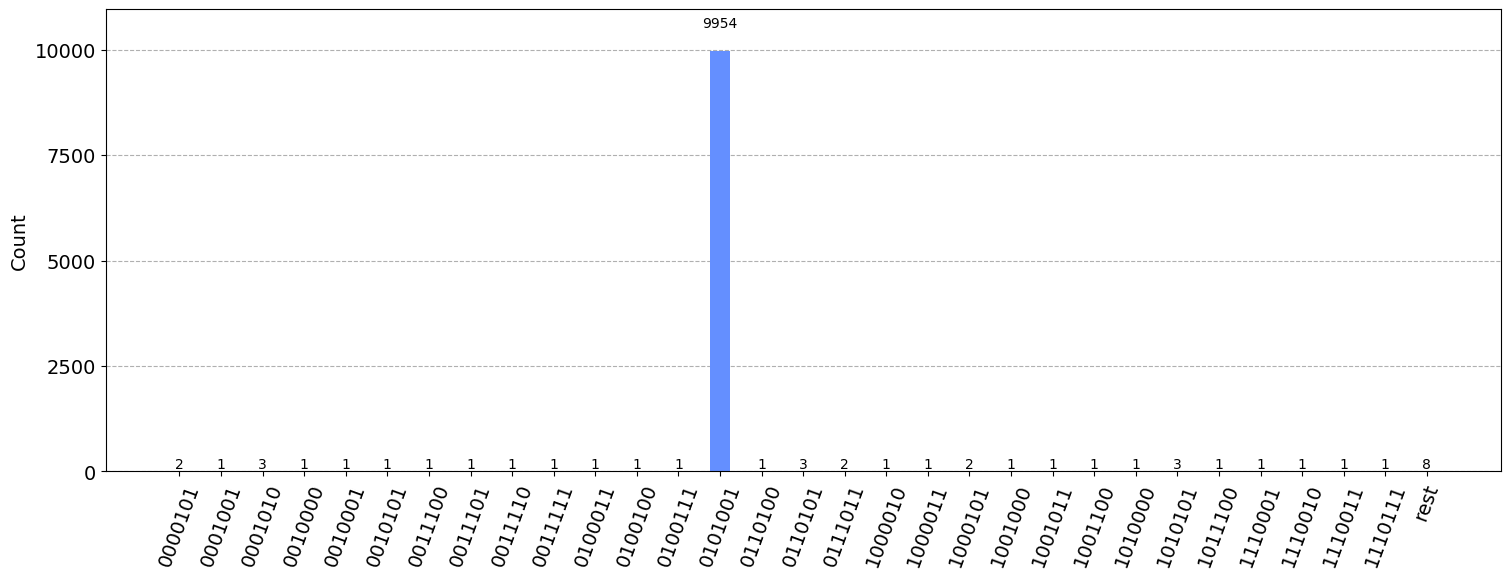

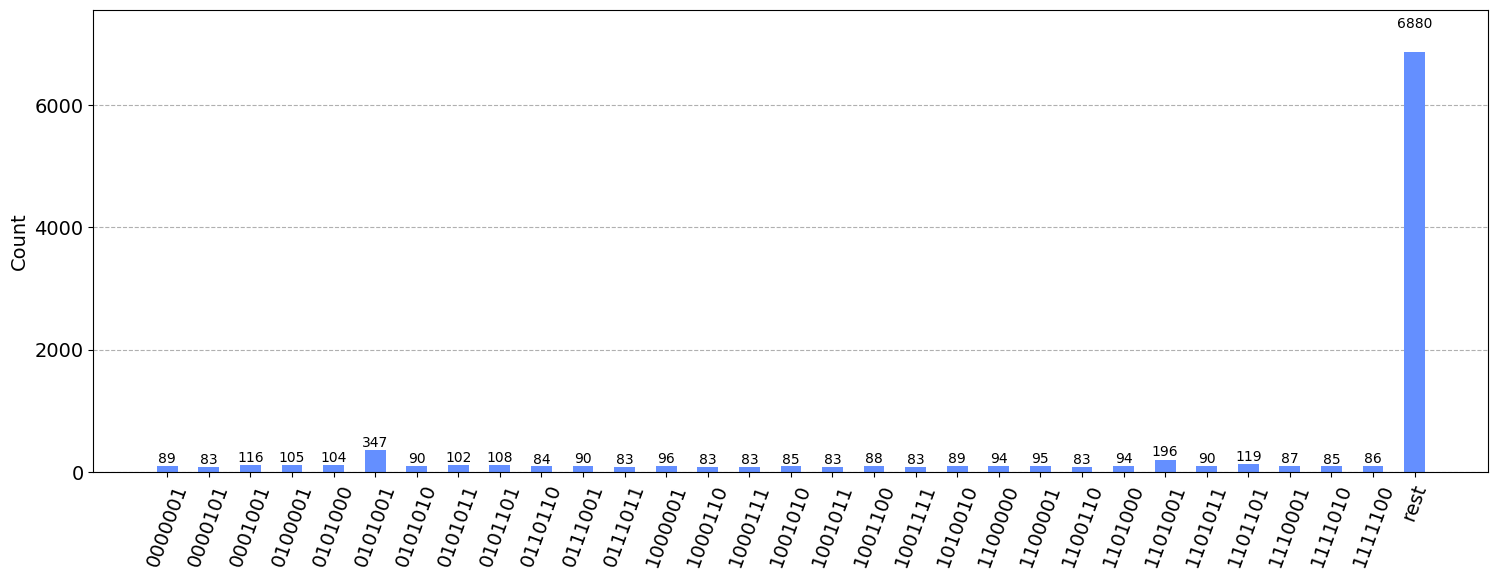

In [21]:
display(plot_histogram(counts,figsize=(18,6),number_to_keep=30))

display(plot_histogram(counts_noise,figsize=(18,6),number_to_keep=30))